In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score, confusion_matrix
import tensorflow as tf
import time
import random
from itertools import product
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

c:\Users\Gaurav Kumar Jha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Gaurav Kumar Jha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Gaurav Kumar Jha\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 

Data Pre-processing

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
df = pd.read_csv('28.csv') 

In [53]:
df.shape

(2200, 8)

In [54]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [55]:
print("Unique labels:", df['label'].unique())

Unique labels: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [56]:
print("Count of each label:")
print(df['label'].value_counts())

Count of each label:
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


In [57]:
num_labels = df['label'].nunique()
print("Number of unique labels:", num_labels)

Number of unique labels: 22


In [58]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

Number of duplicate rows: 0


=> No missing values, no duplicate entries and total 22 unique labels and data are balanced

Input features and Target features

In [59]:
X = df.drop(columns=['label'])
y = df['label']

In [60]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [61]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

Numerical Encoding

In [62]:
le = LabelEncoder()
y_enc = le.fit_transform(y)  
n_classes = len(le.classes_)

In [63]:
y_enc

array([20, 20, 20, ...,  5,  5,  5], shape=(2200,))

In [64]:
n_classes

22

In [65]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_enc, test_size=0.3, random_state=42, stratify=y_enc
)

In [66]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((1540, 7), (330, 7), (1540,), (330,), (330, 7), (330,))

In [68]:
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{u}: {c}")

0: 70
1: 70
2: 70
3: 70
4: 70
5: 70
6: 70
7: 70
8: 70
9: 70
10: 70
11: 70
12: 70
13: 70
14: 70
15: 70
16: 70
17: 70
18: 70
19: 70
20: 70
21: 70


In [69]:
unique, counts = np.unique(y_val, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{u}: {c}")

0: 15
1: 15
2: 15
3: 15
4: 15
5: 15
6: 15
7: 15
8: 15
9: 15
10: 15
11: 15
12: 15
13: 15
14: 15
15: 15
16: 15
17: 15
18: 15
19: 15
20: 15
21: 15


In [70]:
unique, counts = np.unique(y_test, return_counts=True)
for u, c in zip(unique, counts):
    print(f"{u}: {c}")

0: 15
1: 15
2: 15
3: 15
4: 15
5: 15
6: 15
7: 15
8: 15
9: 15
10: 15
11: 15
12: 15
13: 15
14: 15
15: 15
16: 15
17: 15
18: 15
19: 15
20: 15
21: 15


In [71]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.1),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(8, activation='relu'),
    layers.Dense(len(np.unique(y_enc)), activation='softmax')
])

C:\Users\Pragati Nayak\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=5,             
    restore_best_weights=True,  
    verbose=1
)

In [109]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0604 - loss: 3.0882 - val_accuracy: 0.0970 - val_loss: 3.0544
Epoch 2/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1026 - loss: 3.0276 - val_accuracy: 0.1182 - val_loss: 2.9846
Epoch 3/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1442 - loss: 2.9276 - val_accuracy: 0.1667 - val_loss: 2.8537
Epoch 4/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1532 - loss: 2.8025 - val_accuracy: 0.1727 - val_loss: 2.6831
Epoch 5/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1708 - loss: 2.6419 - val_accuracy: 0.2273 - val_loss: 2.4999
Epoch 6/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2032 - loss: 2.4673 - val_accuracy: 0.2333 - val_loss: 2.3080
Epoch 7/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2078 - loss: 2.3077 - val_accuracy: 0.2182 - val_loss: 2.1060
Epoch 8/200
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2494 - loss: 2.1286 - val_accuracy: 0.3394 - v

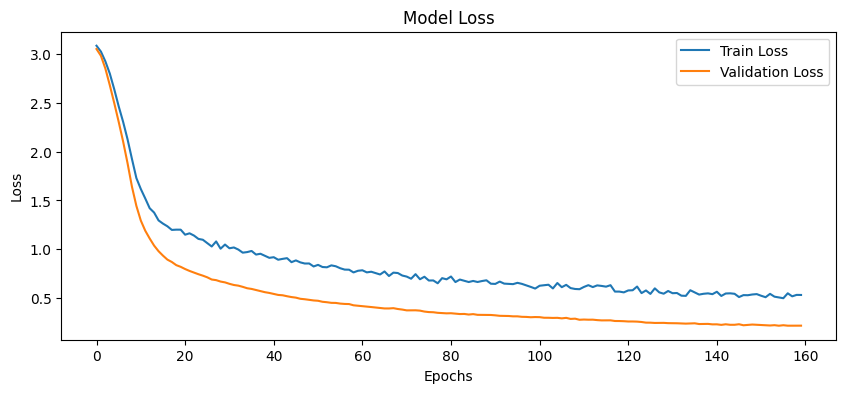

In [110]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [104]:
y_pred = np.argmax(model.predict(X_test), axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [105]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9878787878787879
Precision (macro): 0.9884469696969697
Recall (macro): 0.9878787878787879
F1 Score: 0.9878686756328581

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        15
      cotton       1.00      1.00      1.00        15
      grapes       1.00      1.00      1.00        15
        jute       0.94      1.00      0.97        15
 kidneybeans       0.94      1.00      0.97        15
      lentil       1.00      1.00      1.00        15
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        15
   mothbeans       1.00      0.93      0.97        15
    mungbean       1.00      1.00

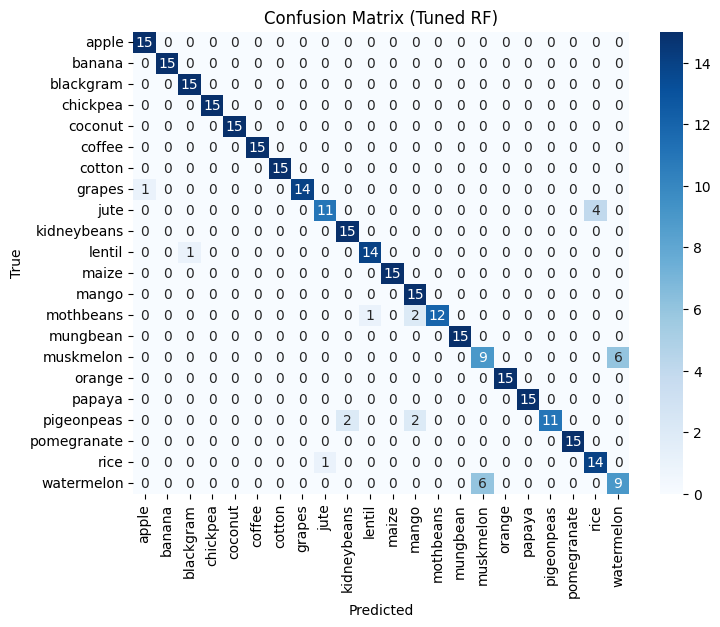

In [79]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Tuned RF)")
plt.show()

Tune the model

In [31]:
X_pool = np.vstack((X_train, X_val))
y_pool = np.concatenate((y_train, y_val))

In [43]:
input_dim = X_pool.shape[1]
n_classes = len(np.unique(y_pool))

In [44]:
input_dim

7

In [45]:
n_classes

22

In [33]:
def ann_model(units, dropout, lr, n_hidden, input_dim, n_classes):
    tf.keras.backend.clear_session()
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))
    for _ in range(n_hidden):
        model.add(layers.Dense(units, activation='relu'))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(n_classes, activation='softmax'))
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
param_space = {
    'units': [16, 32, 64],
    'dropout': [0.1, 0.2],
    'lr': [1e-3, 1e-4],
    'n_hidden': [1, 2, 3],   
    'batch_size': [32, 64, 128],
}

In [ ]:
n_random_trials = 25

In [ ]:
all_combos = []
while len(all_combos) < n_random_trials:
    combo = {
        'units': random.choice(param_space['units']),
        'dropout': random.choice(param_space['dropout']),
        'lr': random.choice(param_space['lr']),
        'n_hidden': random.choice(param_space['n_hidden']),
        'batch_size': random.choice(param_space['batch_size']),
    }
    if combo not in all_combos:
        all_combos.append(combo)

In [39]:
n_splits = 3
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [ ]:
max_epochs = 100
es_patience = 3
best_score = -1.0
best_params = None

In [46]:
start_all = time.time()
for i, params in enumerate(all_combos, 1):
    combo_start = time.time()
    cv_scores = []
    print(f"\nTrial {i}/{len(all_combos)}: {params}")
    for fold, (train_idx, val_idx) in enumerate(skf.split(X_pool, y_pool), 1):
        tf.keras.backend.clear_session()
        model = ann_model(units=params['units'],
                          dropout=params['dropout'],
                          lr=params['lr'],
                          n_hidden=params['n_hidden'],
                          input_dim=input_dim,
                          n_classes=n_classes)

        es = EarlyStopping(monitor='val_loss', patience=es_patience, restore_best_weights=True, verbose=0)

        X_tr = X_pool[train_idx]
        y_tr = y_pool[train_idx]
        X_val_fold = X_pool[val_idx]
        y_val_fold = y_pool[val_idx]

        model.fit(X_tr, y_tr,
                  validation_data=(X_val_fold, y_val_fold),
                  epochs=max_epochs,
                  batch_size=params['batch_size'],
                  callbacks=[es],
                  verbose=1)

        y_val_pred = np.argmax(model.predict(X_val_fold, verbose=0), axis=1)
        cv_f1 = f1_score(y_val_fold, y_val_pred, average='macro')
        cv_scores.append(cv_f1)
        print(f"  fold {fold} F1={cv_f1:.4f}")

    mean_cv = float(np.mean(cv_scores))
    print(f" -> mean CV macro-F1 = {mean_cv:.4f} (trial time {time.time()-combo_start:.1f}s)")

    if mean_cv > best_score:
        best_score = mean_cv
        best_params = params.copy()
        best_params['mean_cv'] = mean_cv

print("\nBEST:", best_score, best_params)
print("Total tuning time: %.1f seconds" % (time.time() - start_all))


Trial 1/12: {'units': 32, 'dropout': 0.1, 'lr': 0.001, 'n_hidden': 2, 'batch_size': 64}
Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0803 - loss: 3.0867 - val_accuracy: 0.1522 - val_loss: 2.9926
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1565 - loss: 2.9428 - val_accuracy: 0.2147 - val_loss: 2.8467
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2135 - loss: 2.7888 - val_accuracy: 0.2949 - val_loss: 2.6680
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2881 - loss: 2.5960 - val_accuracy: 0.3910 - val_loss: 2.4508
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3620 - loss: 2.3804 - val_accuracy: 0.4679 - val_loss: 2.2113
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4205 - loss: 2.1542 - val_accuracy: 0.5240 - val_loss: 1.9565
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4952 - loss: 1.9033 - val_accuracy: 0.6170 - val_loss: 1.6924
Epoch 8/200
20/20 ━━━

In [48]:
y_test_pred = np.argmax(model.predict(X_test, verbose=0), axis=1)
test_acc = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='macro')

In [112]:
print("\nTest Accuracy:", round(test_acc, 4))
print("Precision (macro):", precision_score(y_test, y_test_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_pred, average='macro'))
print("Test F1 (macro):", round(test_f1, 4))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred, target_names=le.classes_))


Test Accuracy: 0.9576
Precision (macro): 0.9608851674641148
Recall (macro): 0.9575757575757575
Test F1 (macro): 0.9573

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        15
      banana       1.00      1.00      1.00        15
   blackgram       0.94      1.00      0.97        15
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        15
      cotton       0.79      1.00      0.88        15
      grapes       1.00      1.00      1.00        15
        jute       0.87      0.87      0.87        15
 kidneybeans       0.93      0.93      0.93        15
      lentil       1.00      0.93      0.97        15
       maize       1.00      0.73      0.85        15
       mango       0.94      1.00      0.97        15
   mothbeans       1.00      0.93      0.97        15
    mungbean       1.00      1.00      1.00 

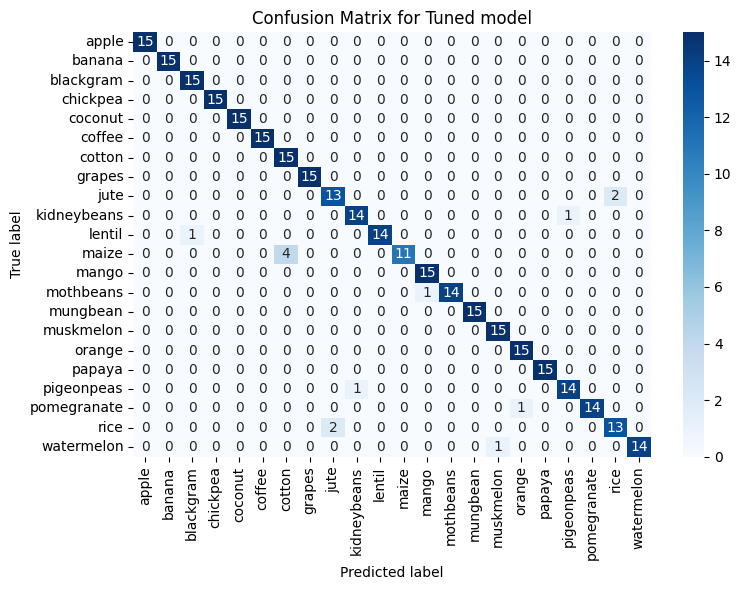

In [113]:
cm = confusion_matrix(y_test, y_test_pred)
cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Tuned model')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()